In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression

In [35]:
df=pd.read_csv("happiness_score_dataset.csv")

In [34]:
df.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [5]:
df.shape

(158, 12)

In [6]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [7]:
df=df.drop_duplicates()

In [8]:
df.shape

(158, 12)

In [9]:
df["Country"].value_counts()

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64

In [10]:
df["Region"].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [12]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<Axes: >

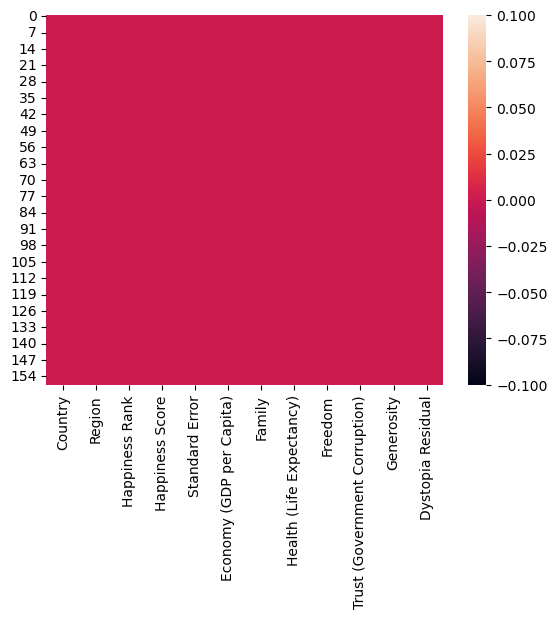

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [15]:
df.nunique().to_frame("unique value")

,unique value
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


In [16]:
x=df["Happiness Score"]
y=df["Standard Error"]

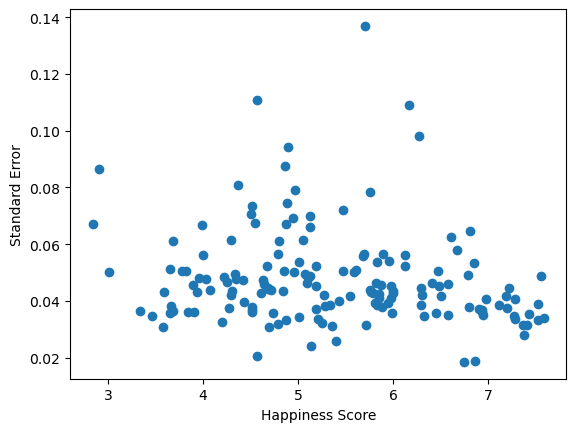

In [17]:
plt.scatter(x,y)
plt.xlabel("Happiness Score")
plt.ylabel("Standard Error")
plt.show()

<Axes: xlabel='Happiness Score', ylabel='Standard Error'>

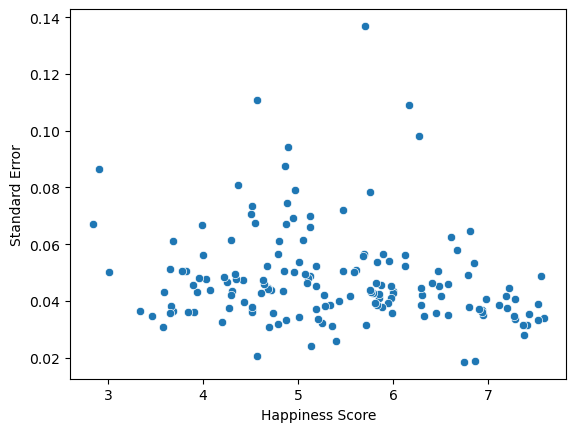

In [18]:
sns.scatterplot(data=df,x="Happiness Score",y="Standard Error")

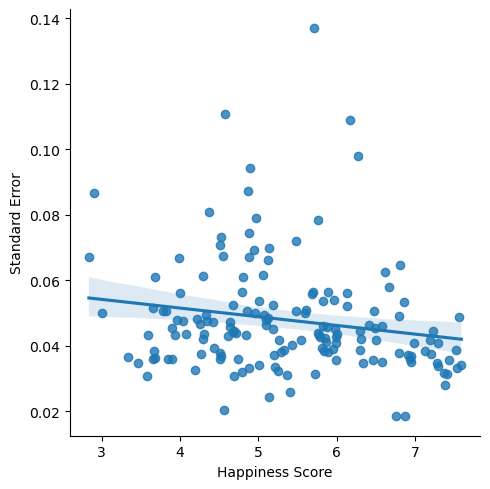

In [19]:
sns.lmplot(x="Happiness Score",y="Standard Error",data=df,palette="colorblind")

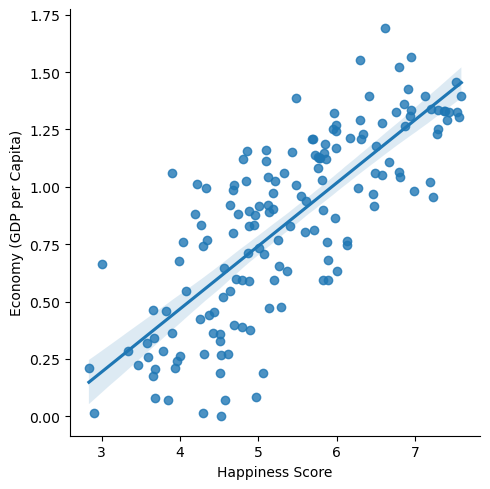

In [20]:
sns.lmplot(x="Happiness Score",y="Economy (GDP per Capita)",data=df,palette="colorblind")

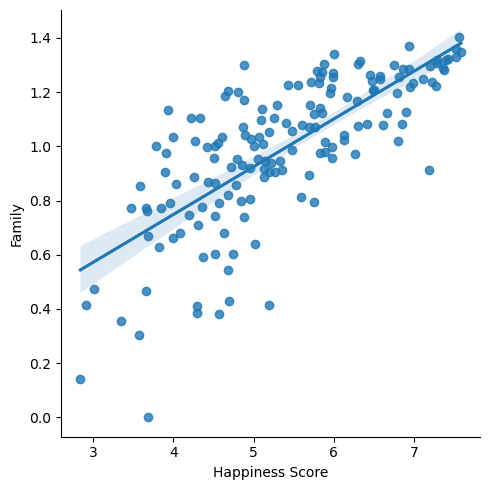

In [21]:
sns.lmplot(x="Happiness Score",y="Family",data=df,palette="colorblind")

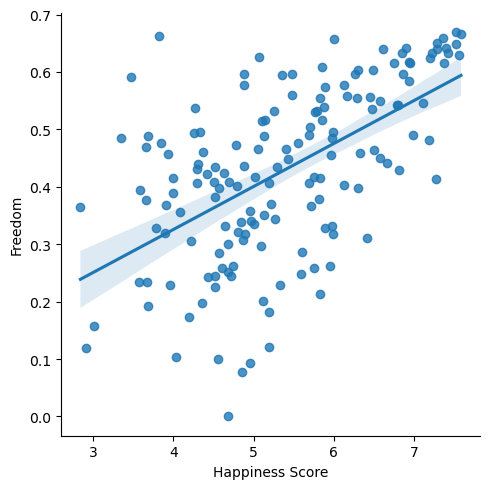

In [22]:
sns.lmplot(x="Happiness Score",y="Freedom",data=df,palette="colorblind")

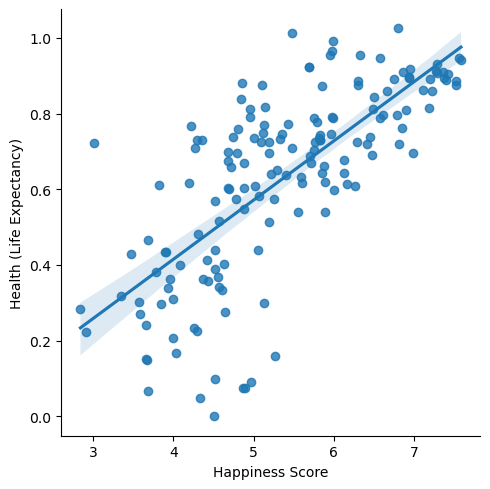

In [23]:
sns.lmplot(x="Happiness Score",y="Health (Life Expectancy)",data=df,palette="colorblind")

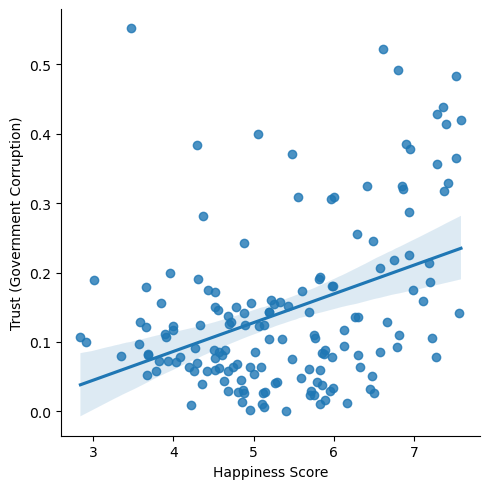

In [24]:
sns.lmplot(x="Happiness Score",y="Trust (Government Corruption)",data=df,palette="colorblind")

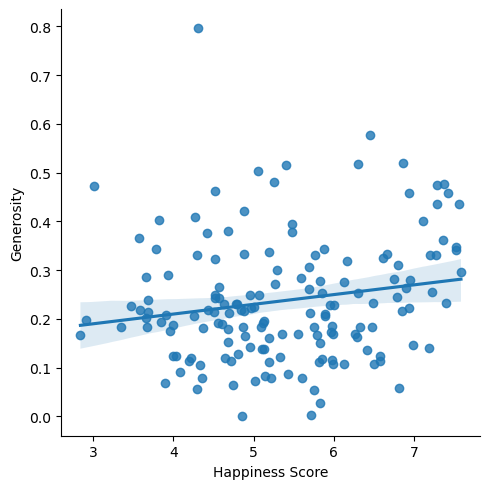

In [25]:
sns.lmplot(x="Happiness Score",y="Generosity",data=df,palette="colorblind")

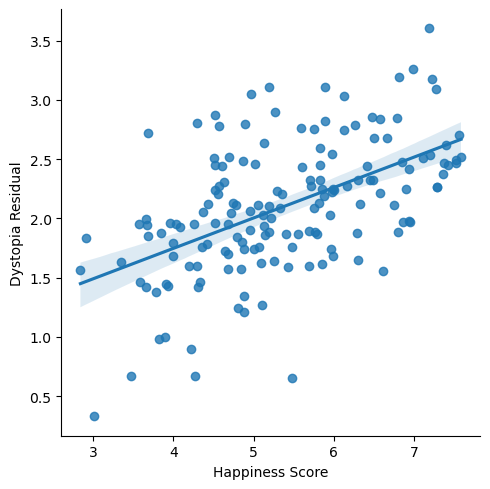

In [26]:
sns.lmplot(x="Happiness Score",y="Dystopia Residual",data=df,palette="colorblind")

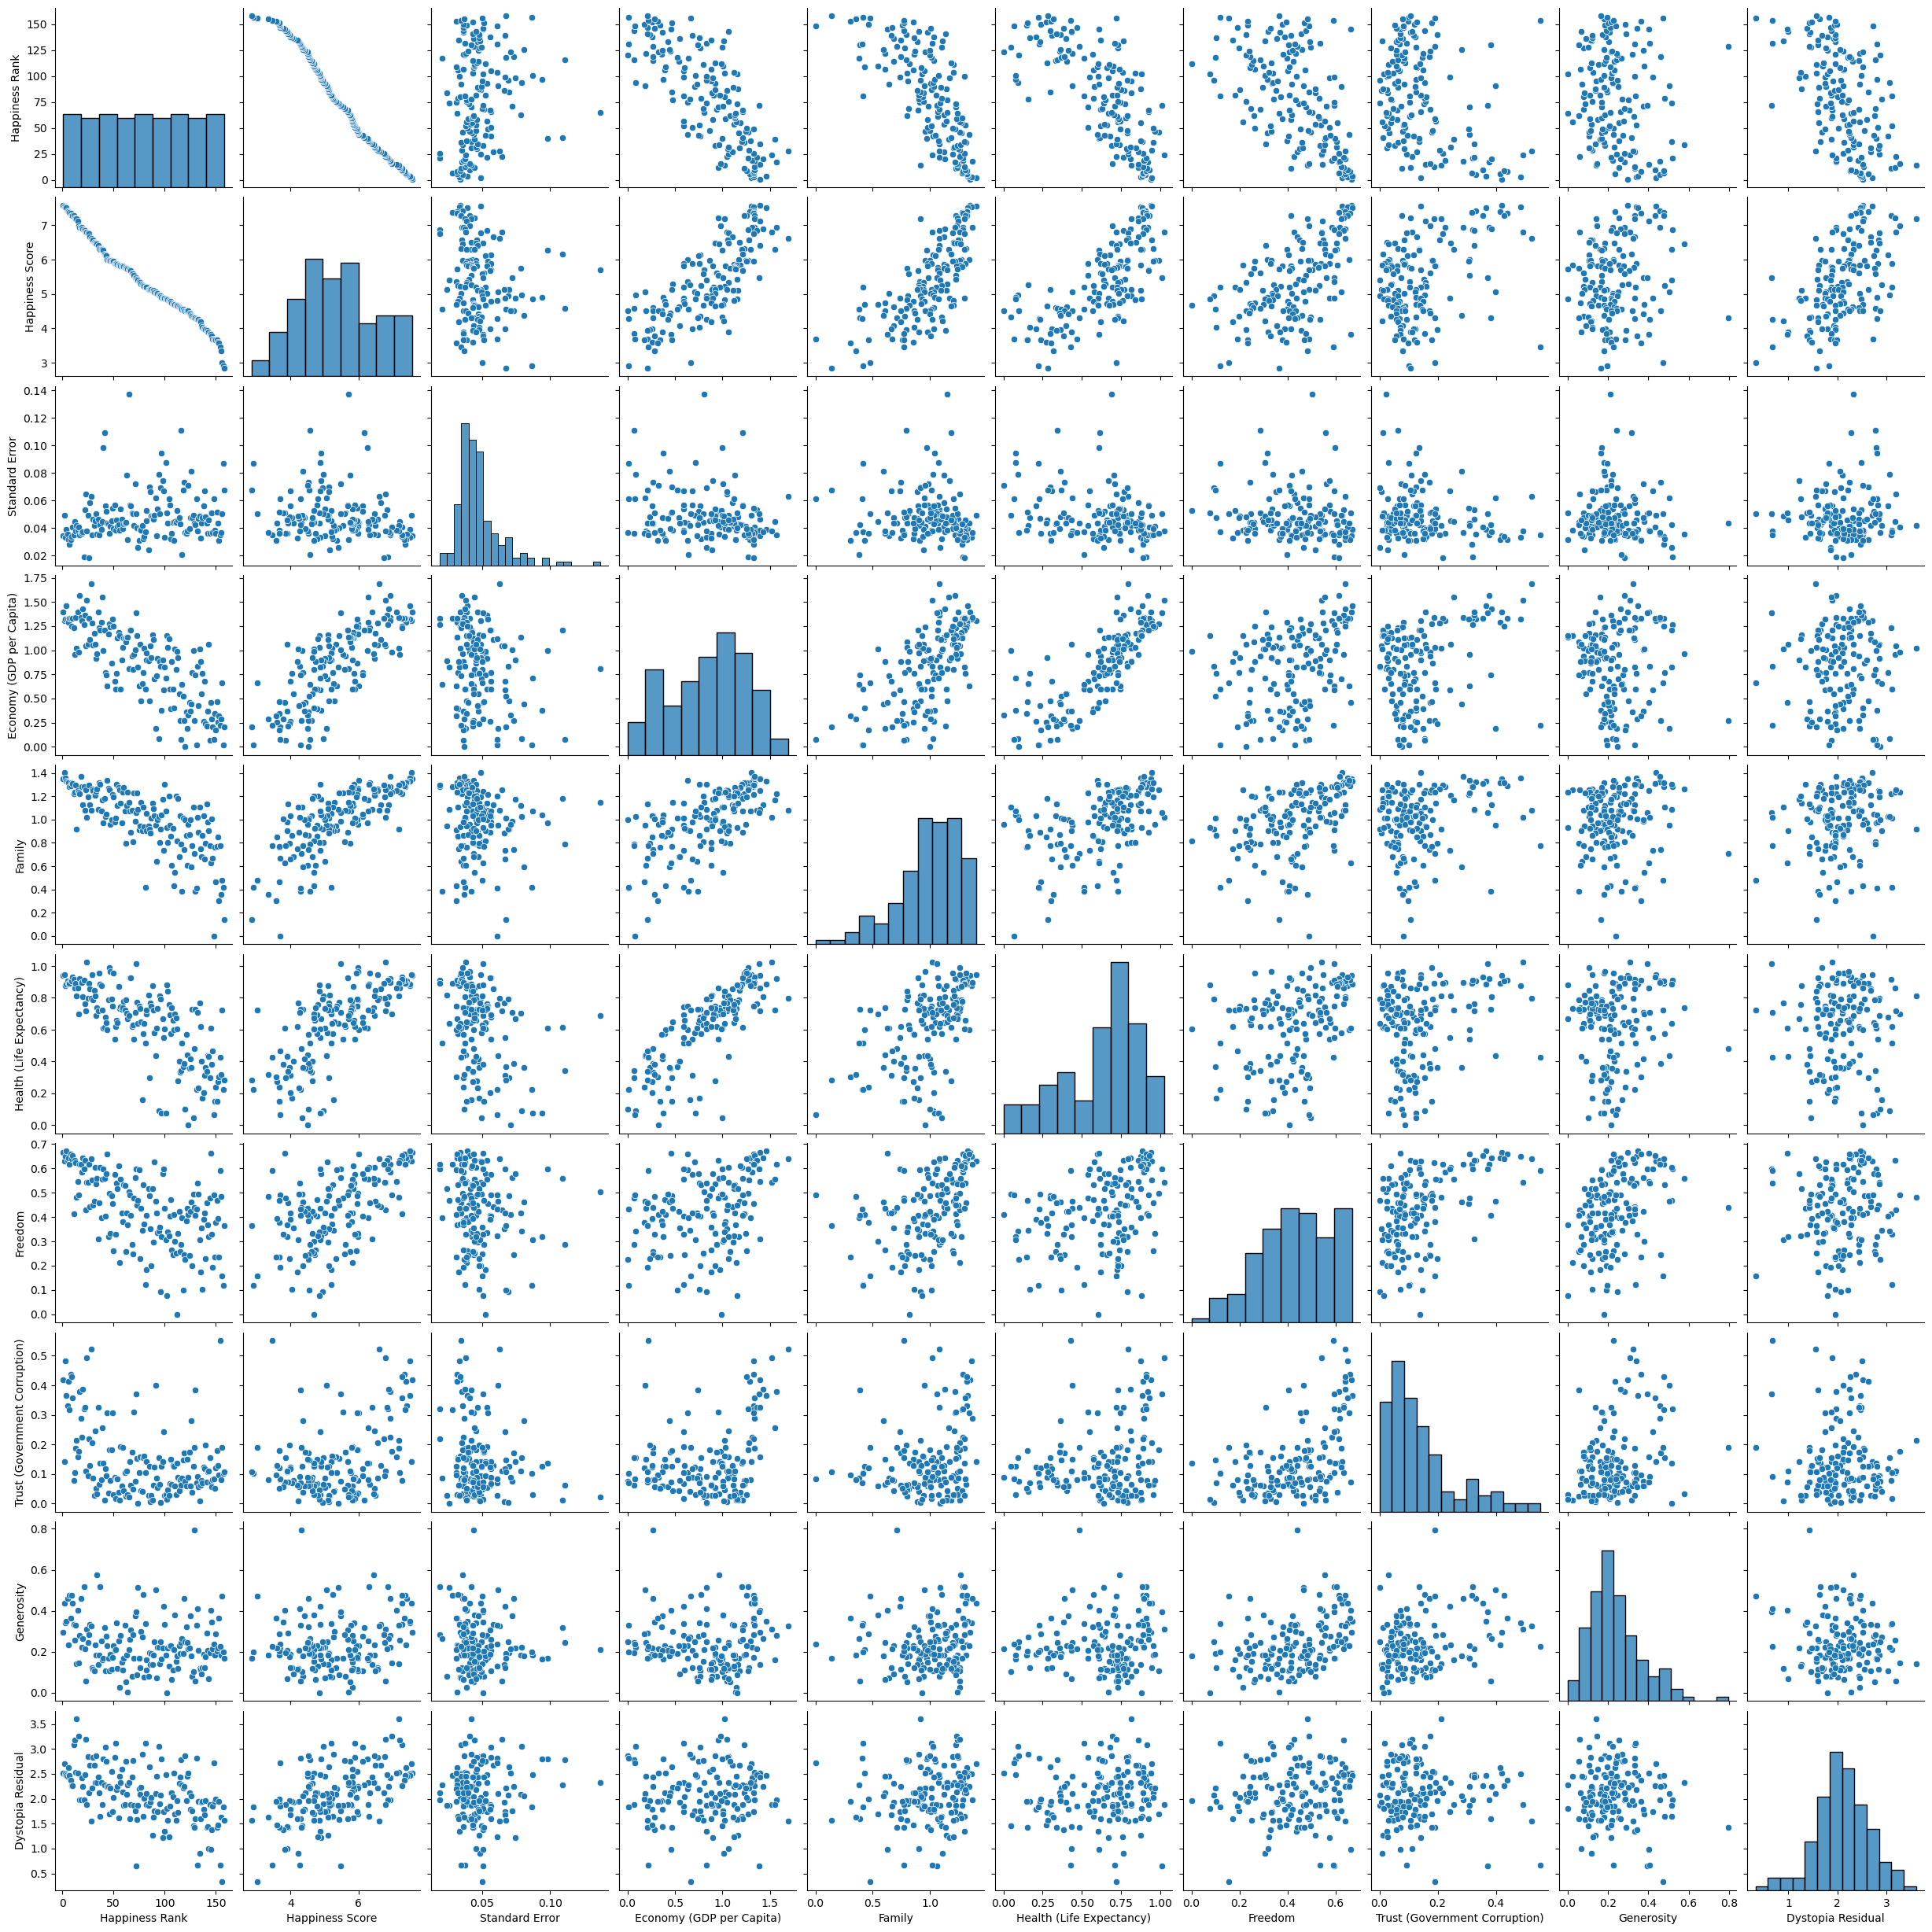

In [27]:
sns.pairplot(data=df,palette="Dark2")

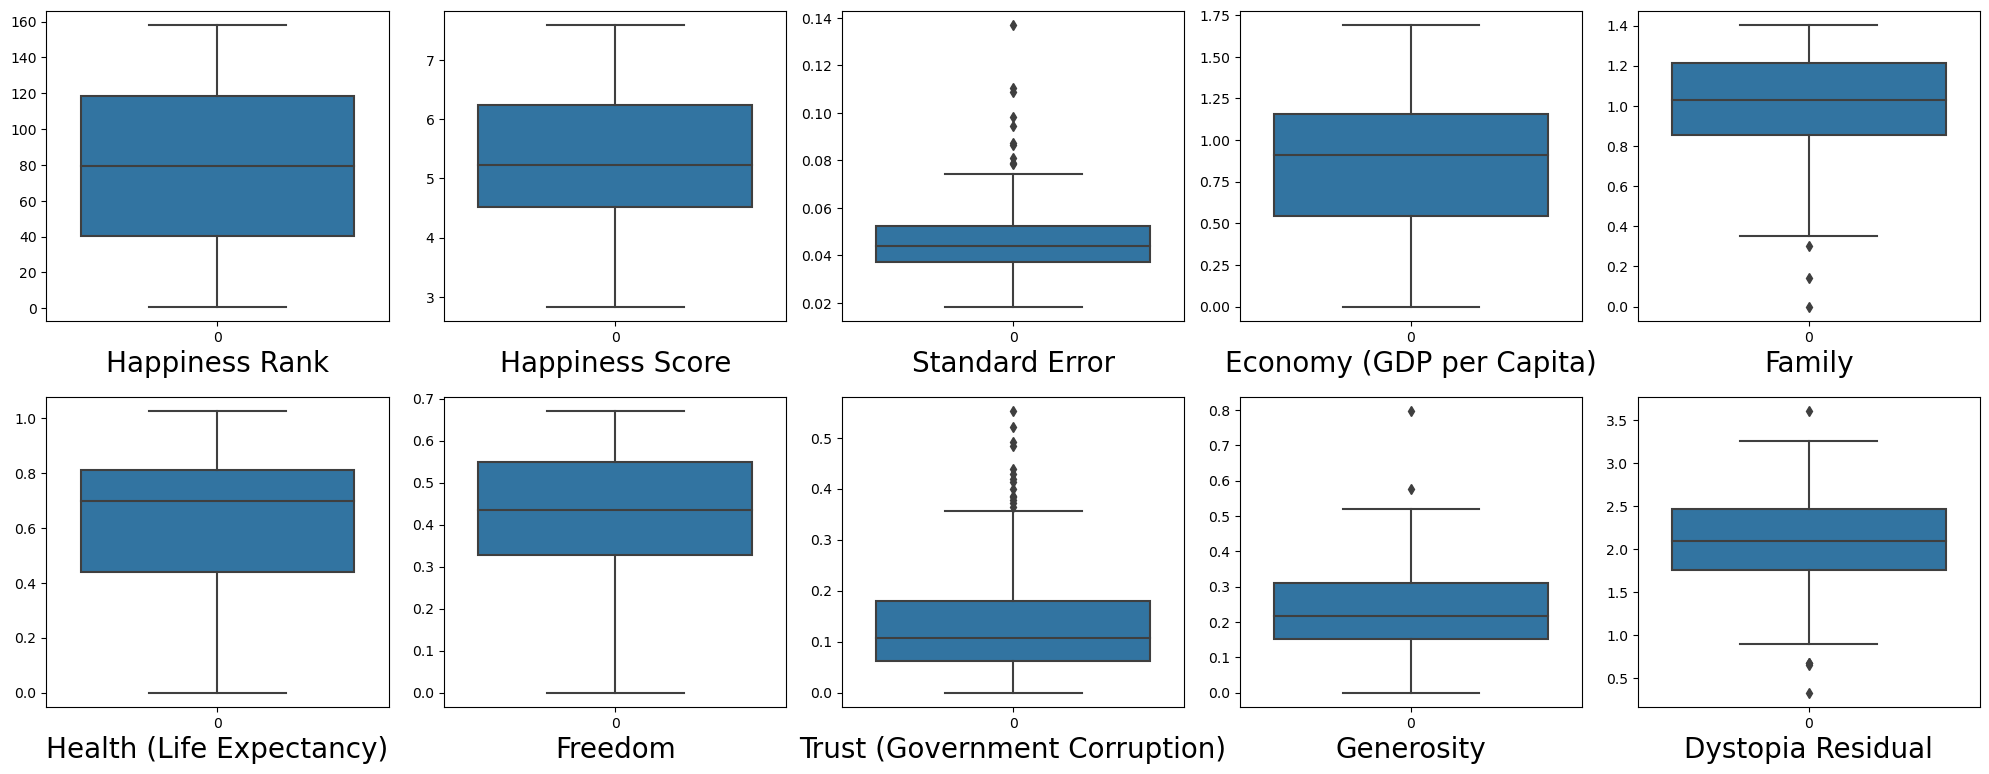

In [30]:
plt.figure(figsize=(20,15),facecolor='white')
plot_number=1
for column in df:
    if plot_number<=20:
        
        ax=plt.subplot(4,5,plot_number)
        
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
     
        
    plot_number+=1
    
plt.tight_layout()


In [36]:
df1=df.drop(columns=["Country","Region"],axis=1)


In [37]:
df1

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [38]:
z=np.abs(zscore(df1))
z

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.721000,1.937360,0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,1.699075,1.914581,0.055889,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
2,1.677149,1.884792,0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,1.655224,1.880411,0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,1.633299,1.797179,0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...,...
153,1.633576,1.674055,0.774917,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925
154,1.655501,1.783571,0.662582,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967
155,1.677427,2.076199,0.132534,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430
156,1.699352,2.164688,2.263962,2.067566,2.118467,1.649648,2.064472,0.357715,0.316950,0.481985


In [39]:
df1=df1[(z<3).all(axis=1)]

In [41]:
df1.describe()


,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,77.617450,5.429611,0.046241,0.862163,1.008623,0.638624,0.427449,0.140405,0.231500,2.120862
std,44.854208,1.111256,0.014043,0.387975,0.251890,0.245937,0.150864,0.113385,0.119897,0.525654
min,1.000000,2.905000,0.018480,0.000000,0.302850,0.000000,0.000000,0.000000,0.000000,0.654290
25%,39.000000,4.610000,0.036800,0.593250,0.885880,0.467210,0.328180,0.061460,0.142720,1.792930
50%,78.000000,5.268000,0.043610,0.920490,1.035160,0.703800,0.434500,0.107130,0.213330,2.100170
75%,115.000000,6.295000,0.050690,1.159910,1.223930,0.814440,0.546040,0.175210,0.300300,2.465310
max,157.000000,7.587000,0.098110,1.563910,1.402230,1.025250,0.669730,0.492100,0.576300,3.602140


<Axes: xlabel='Standard Error', ylabel='Density'>

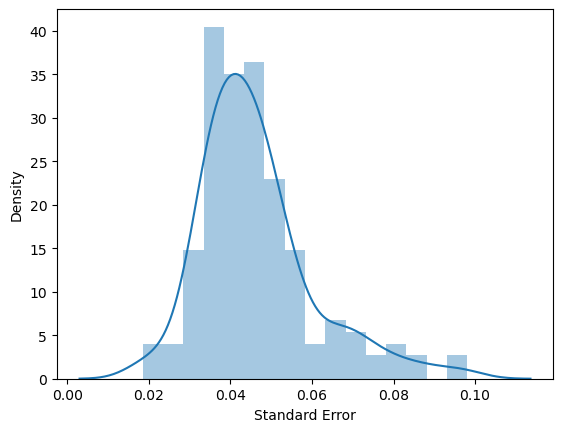

In [42]:
sns.distplot(df1["Standard Error"])

In [43]:
df1.skew()

Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [44]:
for col in df1:
    
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log(df1[col])
df1.skew()

Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   0.123220
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)         NaN
Generosity                            NaN
Dystopia Residual               -0.021144
dtype: float64

In [45]:
df1

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,-3.378165,1.39651,1.34951,0.94143,0.66557,-0.868025,-1.214764,2.51738
1,2,7.561,-3.019206,1.30232,1.40223,0.94784,0.62877,-1.955809,-0.829425,2.70201
2,3,7.527,-3.402799,1.32548,1.36058,0.87464,0.64938,-0.726559,-1.074730,2.49204
3,4,7.522,-3.249335,1.45900,1.33095,0.88521,0.66973,-1.007776,-1.058459,2.46531
4,5,7.427,-3.337378,1.32629,1.32261,0.90563,0.63297,-1.109967,-0.780646,2.45176
...,...,...,...,...,...,...,...,...,...,...
150,151,3.655,-2.967923,0.46534,0.77115,0.15185,0.46866,-1.719141,-1.601222,1.41723
151,152,3.587,-3.140989,0.25812,0.85188,0.27125,0.39493,-2.053228,-1.525694,1.46494
152,153,3.575,-3.478943,0.31982,0.30285,0.30335,0.23414,-2.331087,-1.007584,1.95210
154,155,3.340,-3.308801,0.28665,0.35386,0.31910,0.48450,-2.524479,-1.700457,1.63328


In [46]:
for col in df1:
    
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log(df1[col])
df1.skew()

Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   0.123220
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)         NaN
Generosity                            NaN
Dystopia Residual               -0.021144
dtype: float64

In [47]:
df1["Generosity"].skew()

nan

In [48]:
df1.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992921,0.220699,-0.773651,-0.720359,-0.736758,-0.571089,-0.318949,-0.135911,-0.526680
Happiness Score,-0.992921,1.000000,-0.238213,0.773577,0.720868,0.729191,0.585066,0.343524,0.157677,0.528334
Standard Error,0.220699,-0.238213,1.000000,-0.239185,-0.123332,-0.333750,-0.208796,-0.139761,-0.035007,0.021158
Economy (GDP per Capita),-0.773651,0.773577,-0.239185,1.000000,0.628589,0.817470,0.376780,0.157936,-0.054706,0.026936
Family,-0.720359,0.720868,-0.123332,0.628589,1.000000,0.503890,0.474229,0.139964,0.069890,0.118062
Health (Life Expectancy),-0.736758,0.729191,-0.333750,0.817470,0.503890,1.000000,0.382595,0.084615,0.059404,0.031212
Freedom,-0.571089,0.585066,-0.208796,0.376780,0.474229,0.382595,1.000000,0.485933,0.343586,0.058596
Trust (Government Corruption),-0.318949,0.343524,-0.139761,0.157936,0.139964,0.084615,0.485933,1.000000,0.273845,0.112334
Generosity,-0.135911,0.157677,-0.035007,-0.054706,0.069890,0.059404,0.343586,0.273845,1.000000,-0.031921
Dystopia Residual,-0.526680,0.528334,0.021158,0.026936,0.118062,0.031212,0.058596,0.112334,-0.031921,1.000000


In [49]:
X=df1.drop(columns=["Happiness Score"],axis=1)

In [50]:
X

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,-3.378165,1.39651,1.34951,0.94143,0.66557,-0.868025,-1.214764,2.51738
1,2,-3.019206,1.30232,1.40223,0.94784,0.62877,-1.955809,-0.829425,2.70201
2,3,-3.402799,1.32548,1.36058,0.87464,0.64938,-0.726559,-1.074730,2.49204
3,4,-3.249335,1.45900,1.33095,0.88521,0.66973,-1.007776,-1.058459,2.46531
4,5,-3.337378,1.32629,1.32261,0.90563,0.63297,-1.109967,-0.780646,2.45176
...,...,...,...,...,...,...,...,...,...
150,151,-2.967923,0.46534,0.77115,0.15185,0.46866,-1.719141,-1.601222,1.41723
151,152,-3.140989,0.25812,0.85188,0.27125,0.39493,-2.053228,-1.525694,1.46494
152,153,-3.478943,0.31982,0.30285,0.30335,0.23414,-2.331087,-1.007584,1.95210
154,155,-3.308801,0.28665,0.35386,0.31910,0.48450,-2.524479,-1.700457,1.63328


In [51]:
Y=df1["Happiness Score"]

In [52]:
Y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 149, dtype: float64

In [53]:
Y.info()

<class 'pandas.core.series.Series'>
Int64Index: 149 entries, 0 to 156
Series name: Happiness Score
Non-Null Count  Dtype  
--------------  -----  
149 non-null    float64
dtypes: float64(1)
memory usage: 2.3 KB


In [54]:
model=LinearRegression()

In [55]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [56]:
print(X.shape,x_train.shape,x_test.shape,y_train.shape)

(149, 9) (119, 9) (30, 9) (119,)


In [59]:
model.fit(x_train,y_train)

ValueError: Input X contains infinity or a value too large for dtype('float64').